<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

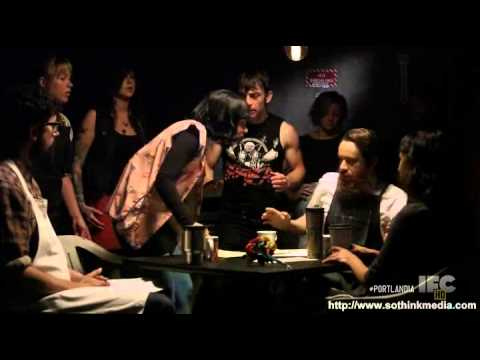

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

'/Users/johnrivera/Documents/GitHub/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [ ]:
import pandas as pd

pd.get_option("display.max_columns", 10)
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


# Cleaning Data Frame

In [ ]:
#Cleaning Star Rating Column
shops['star_rating'] = shops['star_rating'].str.strip('star rating').astype(float)
#shops['full_review_text'] = shops['full_review_text'].str[10:].str.strip() --> REMOVES first 10 characters and then strips leading,ending white spaces
shops['full_review_text'].replace({'\d+[\/:\-]\d+[\/:\-\s]*[\dAaPpMm]*' : '', '\w+\s\d+[\,]\s\d+' : ''},regex=True,inplace=True,)
shops['full_review_text'] = shops['full_review_text'].str.strip('1 ').str.strip()

In [ ]:
shops

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,check-in Love love loved the atmosphere! Every...,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0
2,The Factory - Cafe With a Soul,check-in Listed in Brunch Spots I loved the ec...,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0
4,The Factory - Cafe With a Soul,check-in They are located within the Northcros...,4.0
...,...,...,...
7611,The Steeping Room,I actually step into this restaurant by chance...,4.0
7612,The Steeping Room,"Ok, The Steeping Room IS awesome. How do they ...",5.0
7613,The Steeping Room,"Loved coming here for tea, and the atmosphere ...",4.0
7614,The Steeping Room,The food is just average. The booths didn't fe...,3.0


In [ ]:
#Create tokenize function
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [ ]:
# Start here 
import re
shops['tokens'] =shops['full_review_text'].apply(tokenize)



In [ ]:
shops['tokens'].head()

0    [checkin, love, love, loved, the, atmosphere, ...
1    [listed, in, date, night, austin, ambiance, in...
2    [checkin, listed, in, brunch, spots, i, loved,...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [checkin, they, are, located, within, the, nor...
Name: tokens, dtype: object

In [ ]:
#Make count function to see frequency of tokens
# Object from Base Python
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [ ]:
token_counts = count(shops['tokens'])

In [ ]:
token_counts

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
70,the,6847,34809,1.0,0.045126,0.045126,0.899028
25,and,6863,26629,2.0,0.034522,0.079648,0.901129
44,a,6246,22754,3.0,0.029498,0.109146,0.820116
6,i,5528,20237,4.0,0.026235,0.135381,0.725840
38,to,5653,17164,5.0,0.022251,0.157632,0.742253
...,...,...,...,...,...,...,...
20353,roomier,1,1,20355.0,0.000001,0.999995,0.000131
20354,windowed,1,1,20356.0,0.000001,0.999996,0.000131
20356,actuality,1,1,20357.0,0.000001,0.999997,0.000131
20355,crass,1,1,20358.0,0.000001,0.999999,0.000131


# Visualizations

In [ ]:
#Display data frame of witb counts of words for all documents
token_counts.sort_values(by='count',ascending=False).head(30)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
70,the,6847,34809,1.0,0.045126,0.045126,0.899028
25,and,6863,26629,2.0,0.034522,0.079648,0.901129
44,a,6246,22754,3.0,0.029498,0.109146,0.820116
6,i,5528,20237,4.0,0.026235,0.135381,0.725840
38,to,5653,17164,5.0,0.022251,0.157632,0.742253
47,of,5100,12598,6.0,0.016332,0.173964,0.669643
73,is,4999,11999,7.0,0.015555,0.189519,0.656381
69,coffee,4877,10352,8.0,0.013420,0.202939,0.640362
48,was,3765,9707,9.0,0.012584,0.215523,0.494354
74,in,4563,9551,10.0,0.012382,0.227905,0.599133


<AxesSubplot:>

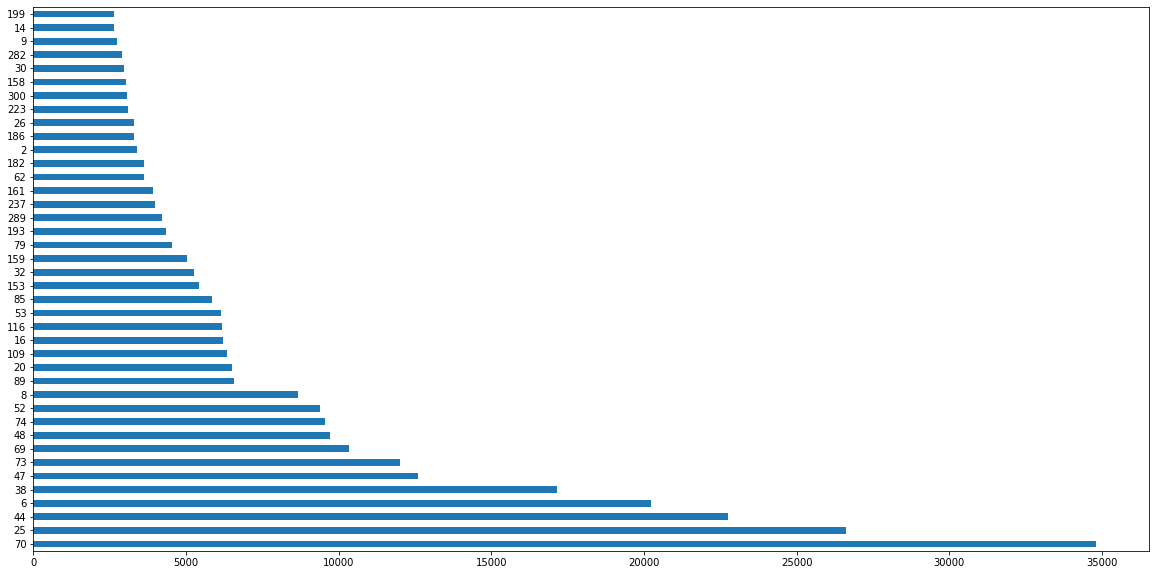

In [ ]:
#visualizae token counts

token_counts['count'].head(40).plot(kind='barh', figsize=(20,10))            

# Custom Stop Removal Technique

In [ ]:
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)


#Apply Custom Stopwords Removal Technique; its going to exclude punction and stop words
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['StopRemoval'] = tokens

In [ ]:
shops

,coffee_shop_name,full_review_text,star_rating,tokens,StopRemoval
0,The Factory - Cafe With a Soul,check-in Love love loved the atmosphere! Every...,5.0,"[checkin, love, love, loved, the, atmosphere, ...","[check-in, love, love, loved, atmosphere!, cor..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,"[listed, in, date, night, austin, ambiance, in...","[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,check-in Listed in Brunch Spots I loved the ec...,4.0,"[checkin, listed, in, brunch, spots, i, loved,...","[check-in, listed, brunch, spots, loved, eclec..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,"[very, cool, decor, good, drinks, nice, seatin...","[cool, decor!, good, drinks, nice, seating, ,..."
4,The Factory - Cafe With a Soul,check-in They are located within the Northcros...,4.0,"[checkin, they, are, located, within, the, nor...","[check-in, located, northcross, mall, shopping..."
...,...,...,...,...,...
7611,The Steeping Room,I actually step into this restaurant by chance...,4.0,"[i, actually, step, into, this, restaurant, by...","[actually, step, restaurant, chance, favorites..."
7612,The Steeping Room,"Ok, The Steeping Room IS awesome. How do they ...",5.0,"[ok, the, steeping, room, is, awesome, how, do...","[ok,, steeping, room, awesome., great, menu, i..."
7613,The Steeping Room,"Loved coming here for tea, and the atmosphere ...",4.0,"[loved, coming, here, for, tea, and, the, atmo...","[loved, coming, tea,, atmosphere, pretty, fres..."
7614,The Steeping Room,The food is just average. The booths didn't fe...,3.0,"[the, food, is, just, average, the, booths, di...","[food, average., booths, didn't, feel, clean.,..."


# Applying the  Lemmitization Technique


In [ ]:
nlp = spacy.load("en_core_web_lg")


In [ ]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.is_space == False):
            lemmas.append(token.lemma_)
    
    return lemmas

In [ ]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [ ]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,StopRemoval,lemmas
0,The Factory - Cafe With a Soul,check-in Love love loved the atmosphere! Every...,5.0,"[checkin, love, love, loved, the, atmosphere, ...","[check-in, love, love, loved, atmosphere!, cor...","[check, Love, love, love, atmosphere, corner, ..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,"[listed, in, date, night, austin, ambiance, in...","[listed, date, night:, austin,, ambiance, aust...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,check-in Listed in Brunch Spots I loved the ec...,4.0,"[checkin, listed, in, brunch, spots, i, loved,...","[check-in, listed, brunch, spots, loved, eclec...","[check, list, Brunch, Spots, love, eclectic, h..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,"[very, cool, decor, good, drinks, nice, seatin...","[cool, decor!, good, drinks, nice, seating, ,...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,check-in They are located within the Northcros...,4.0,"[checkin, they, are, located, within, the, nor...","[check-in, located, northcross, mall, shopping...","[check, locate, Northcross, mall, shopping, ce..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [ ]:
#I want to analyze the coffee shops tokens based on the one ones that have a star rating greater than 4  or less than 4
# From there I will be abke to filter the coffee shops I can consider to be bad or good
good_coffee = shops[shops['star_rating'] >= 4.0]
bad_coffee = shops[shops['star_rating'] < 4.0]

In [ ]:
wc_good = count(good_coffee['lemmas'])
wc_bad = count(bad_coffee['lemmas'])

In [ ]:
wc_good

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
37,coffee,3911,8021,1.0,0.028605,0.028605,0.636971
103,place,3123,4804,2.0,0.017132,0.045737,0.508632
197,good,2928,4344,3.0,0.015492,0.061229,0.476873
106,great,2497,3455,4.0,0.012321,0.073551,0.406678
30,check,2686,2942,5.0,0.010492,0.084043,0.437459
...,...,...,...,...,...,...,...
14662,windowed,1,1,14664.0,0.000004,0.999986,0.000163
14664,actuality,1,1,14665.0,0.000004,0.999989,0.000163
14663,crass,1,1,14666.0,0.000004,0.999993,0.000163
14667,digestion,1,1,14667.0,0.000004,0.999996,0.000163


In [ ]:
wc_bad

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,coffee,934,2111,1.0,0.026867,0.026867,0.632791
37,place,752,1225,2.0,0.015591,0.042458,0.509485
24,good,647,1000,3.0,0.012727,0.055186,0.438347
9,like,596,945,4.0,0.012027,0.067213,0.403794
67,order,430,759,5.0,0.009660,0.076873,0.291328
...,...,...,...,...,...,...,...
7492,atop,1,1,7494.0,0.000013,0.999949,0.000678
7491,dull,1,1,7495.0,0.000013,0.999962,0.000678
7495,tasted,1,1,7496.0,0.000013,0.999975,0.000678
7490,imo,1,1,7497.0,0.000013,0.999987,0.000678


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


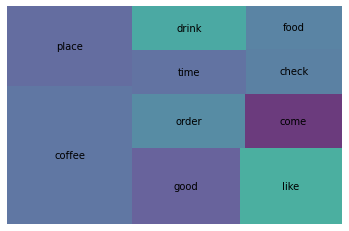

In [ ]:
#get top 10 words to visualize
import squarify
import matplotlib.pyplot as plt
wc_top10_bad = wc_bad[wc_bad['rank'] <= 10]

squarify.plot(sizes=wc_top10_bad['pct_total'], label=wc_top10_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

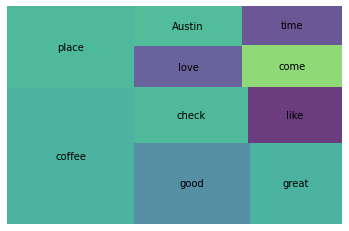

In [ ]:
#get top 10 words to visualize
import squarify
import matplotlib.pyplot as plt
wc_top10_good = wc_good[wc_good['rank'] <= 10]

squarify.plot(sizes=wc_top10_good['pct_total'], label=wc_top10_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

